In [1]:
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os

def get_current_dir():
    return os.getcwd().split("/")[-1]

def in_project_root_directory():
    return get_current_dir() == "ai-coursework-group6"

if not in_project_root_directory():
    os.chdir('..')
import virl
from helper_methods import plot as rand_deter_plot
from plot_helper import plot as eval_plot
from matplotlib import pyplot as plt
import pickle
import itertools

from notebooks.eval_data import EvalData

## Deterministic

In [ ]:
from DeterministicAgent import DeterministicAgent
from helper_methods import run

In [ ]:
actions = ["no intervention", "impose a full lockdown", "implement track and trace", "enforce social distancing and face masks"]

def evaluate_deterministic(eval_data, action):
    for i in range(0,10):
        env = virl.Epidemic(stochastic=eval_data.stochastic, noisy=eval_data.noisy, problem_id=i)
        agent = DeterministicAgent(env, action, actions[action])
        rewards = run(agent, 25)
        eval_data.add_rewards(i, rewards)
    return eval_data

In [ ]:
action = 0

eval_data = EvalData("Deterministic " + actions[action], stochastic=False, noisy=False)
evaluate_deterministic(eval_data, action)
eval_data.create_plot()
eval_data.create_table()

## Random

In [ ]:
from RandomAgent import RandomAgent
from helper_methods import run

In [ ]:
actions = ["no intervention", "impose a full lockdown", "implement track & trace", "enforce social distancing and face masks"]

def evaluate_random(eval_data):
    for i in range(0,10):
        env = virl.Epidemic(stochastic=eval_data.stochastic, noisy=eval_data.noisy, problem_id=i)
        agent = RandomAgent(env, actions)
        rewards = run(agent, 25)
        eval_data.add_rewards(i, rewards)
    return eval_data

In [ ]:
eval_data = EvalData("Random", stochastic=False, noisy=False)
evaluate_random(eval_data)
eval_data.create_plot()
eval_data.create_table()

In [ ]:
eval_data = EvalData("Random", stochastic=True, noisy=False)
evaluate_random(eval_data)
eval_data.create_plot()
eval_data.create_table()

In [ ]:
eval_data = EvalData("Random", stochastic=False, noisy=True)
evaluate_random(eval_data)
eval_data.create_plot()
eval_data.create_table()

In [ ]:
eval_data = EvalData("Random", stochastic=True, noisy=True)
evaluate_random(eval_data)
eval_data.create_plot()
eval_data.create_table()

## Linear Policy

In [ ]:
from LinearAprxAgent import LinearAprxAgent

def evaluate_linear_policy(eval_data, agent_trained_under_problem_id):
    for i in range(0, 10):
        #load from disk
        intercept = np.genfromtxt("trained_agents/linear_policy/interceptP" + str(agent_trained_under_problem_id) + ".csv", delimiter=',')
        coeff = np.genfromtxt("trained_agents/linear_policy/coeffP" + str(agent_trained_under_problem_id) + ".csv", delimiter=',')
        state_transformed = np.genfromtxt("trained_agents/linear_policy/state_transformedP" + str(agent_trained_under_problem_id) + ".csv", delimiter=',')
        q_values = np.genfromtxt("trained_agents/linear_policy/q_valueP" + str(agent_trained_under_problem_id) + ".csv", delimiter=',')
        last_reward = np.genfromtxt("trained_agents/linear_policy/lastRewardP" + str(agent_trained_under_problem_id) + ".csv", delimiter=',')

        env = virl.Epidemic(stochastic=eval_data.stochastic, noisy=eval_data.noisy)
        agent = LinearAprxAgent(env)
        states,all_rewards, all_total_rewards = agent.evaluate(intercept,coeff,state_transformed[1:,:],q_values,last_reward,episodes=25)
        eval_data.add_rewards(i, all_total_rewards)

In [ ]:
eval_data = EvalData("Linear Policy", stochastic=False, noisy=False)
evaluate_linear_policy(eval_data, agent_trained_under_problem_id=0)
eval_data.create_plot()
eval_data.create_table()

In [ ]:
eval_data = EvalData("Linear Policy", stochastic=True, noisy=False)
evaluate_linear_policy(eval_data, agent_trained_under_problem_id=0)
eval_data.create_plot()
eval_data.create_table()

In [ ]:
eval_data = EvalData("Linear Policy", stochastic=False, noisy=True)
evaluate_linear_policy(eval_data, agent_trained_under_problem_id=0)
eval_data.create_plot()
eval_data.create_table()

In [ ]:
eval_data = EvalData("Linear Policy", stochastic=True, noisy=True)
evaluate_linear_policy(eval_data, agent_trained_under_problem_id=0)
eval_data.create_plot()
eval_data.create_table()

## Tabular Policy

In [2]:
from Tabular_Policy_Agent import Tabular_Policy_Agent


def evaluate_tabular_policy(eval_data, agent_trained_under_problem_id):
    for i in range(0, 10):
         #load from disk    
        
        filename = "trained_agents/tabular_policy/tabular_problem_id_" + str(agent_trained_under_problem_id) + ".txt"    
        
        env = virl.Epidemic(stochastic=eval_data.stochastic, noisy=eval_data.noisy)
        agent = Tabular_Policy_Agent(env)
        states,all_rewards, all_total_rewards = agent.evaluate(filename,episodes=25)
        eval_data.add_rewards(i, all_total_rewards)
        
        

Saved figure at eval_output\Tabular Policy Figure.png
Saved table at eval_output\Tabular Policy Table.png


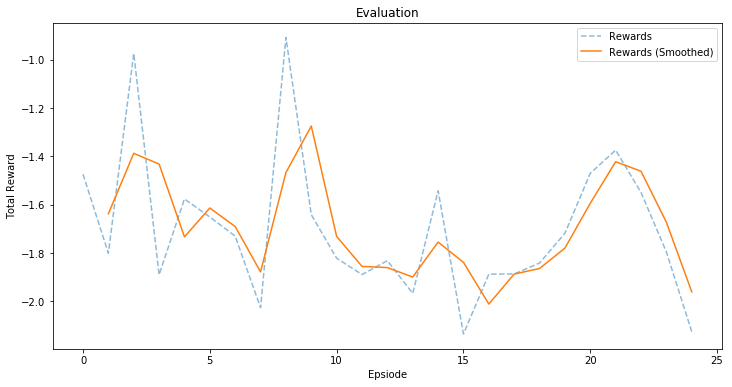

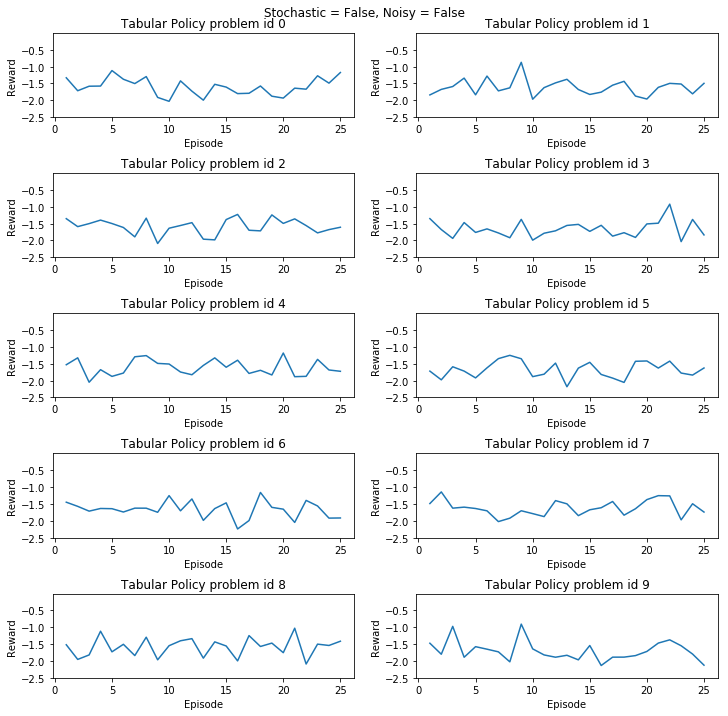

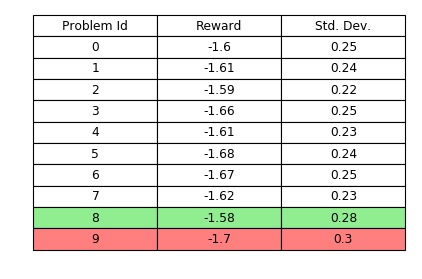

In [3]:
eval_data = EvalData("Tabular Policy", stochastic=False, noisy=False)
evaluate_tabular_policy(eval_data, agent_trained_under_problem_id=0)
eval_data.create_plot()
eval_data.create_table()

In [ ]:
eval_data = EvalData("Tabular Policy", stochastic=False, noisy=True)
evaluate_tabular_policy(eval_data, agent_trained_under_problem_id=0)
eval_data.create_plot()
eval_data.create_table()

In [ ]:
eval_data = EvalData("Tabular Policy", stochastic=True, noisy=False)
evaluate_tabular_policy(eval_data, agent_trained_under_problem_id=0)
eval_data.create_plot()
eval_data.create_table()

In [ ]:
eval_data = EvalData("Tabular Policy", stochastic=True, noisy=True)
evaluate_tabular_policy(eval_data, agent_trained_under_problem_id=0)
eval_data.create_plot()
eval_data.create_table()

## Q learning

In [ ]:
from q_learning_tabular.q_table import QTable
from q_learning_tabular.q_learning_agent import QLearningAgent

In [ ]:
def evaluate_q_learning_tabular(eval_data, agent_trained_under_problem_id):
    for i in range(0,10):
        filename = "trained_agents/q_learning_tabular_problem_id_" + str(agent_trained_under_problem_id) + ".txt"
        internal_loaded_q_table = QTable.load_raw_q_table_from_file(filename)
        env = virl.Epidemic(stochastic=eval_data.stochastic, noisy=eval_data.noisy, problem_id=i)
        agent = QLearningAgent(env, print_out_every_x_episodes=1, internal_q_table=internal_loaded_q_table)
        all_total_rewards = agent.evaluate(25)
        eval_data.add_rewards(i, all_total_rewards)
    return eval_data

In [ ]:
eval_data = EvalData("Q Learning Tabular", stochastic=False, noisy=False)
evaluate_q_learning_tabular(eval_data, 0)
eval_data.create_plot()
eval_data.create_table()

In [ ]:
eval_data = EvalData("Q Learning Tabular", stochastic=True, noisy=False)
evaluate_q_learning_tabular(eval_data, 0)
eval_data.create_plot()
eval_data.create_table()

In [ ]:
eval_data = EvalData("Q Learning Tabular", stochastic=False, noisy=True)
evaluate_q_learning_tabular(eval_data, 0)
eval_data.create_plot()
eval_data.create_table()

In [ ]:
eval_data = EvalData("Q Learning Tabular", stochastic=True, noisy=True)
evaluate_q_learning_tabular(eval_data, 0)
eval_data.create_plot()
eval_data.create_table()

## Q learning Neural Network

In [ ]:
from q_learning_nn.nn_function_approximator import NNFunctionApproximatorJointKeras, init_networks, load_trained_network
from q_learning_nn.memory import ReplayMemory, Transition
from q_learning_nn.agent import Agent
from q_learning_nn.strategy import Strategy
from q_learning_nn.run import qlearning_nn

In [ ]:
def evaluate_q_learning_nn(eval_data, agent_trained_under_problem_id):
    for i in range(0,10):
        filename = "policy_network_problem_id_" + str(agent_trained_under_problem_id) + ".h5"
        policy_network_new, target_network_new = load_trained_network(filename, virl)
        agent = Agent(virl.Epidemic(stochastic=eval_data.stochastic, noisy=eval_data.noisy, problem_id=i), learning_rate=0.0)
        rewards = qlearning_nn(agent=agent, policy_network=policy_network_new, target_network=target_network_new, num_episodes=25)
        eval_data.add_rewards(i, rewards)
    return eval_data

In [ ]:
eval_data = EvalData("Q Learning Neural Network", stochastic=False, noisy=False)
evaluate_q_learning_nn(eval_data, agent_trained_under_problem_id=0)
eval_data.create_plot()
eval_data.create_table()

In [ ]:
eval_data = EvalData("Q Learning Neural Network", stochastic=True, noisy=False)
evaluate_q_learning_nn(eval_data, agent_trained_under_problem_id=0)
eval_data.create_plot()
eval_data.create_table()

In [ ]:
eval_data = EvalData("Q Learning Neural Network", stochastic=False, noisy=True)
evaluate_q_learning_nn(eval_data, agent_trained_under_problem_id=0)
eval_data.create_plot()
eval_data.create_table()

In [ ]:
eval_data = EvalData("Q Learning Neural Network", stochastic=True, noisy=True)
evaluate_q_learning_nn(eval_data, agent_trained_under_problem_id=0)
eval_data.create_plot()
eval_data.create_table()